## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  89.129817   982.834295  0.639443   6.856375  1.554691
1  25.306182  1154.406717  0.739454   7.478072  1.569824
2  73.963663   661.139049  0.074466  10.308518  0.463333
3  89.430479   956.743702  0.061286  10.338161  0.421889
4  21.712727  1366.093618  0.949307   5.580878  1.662613


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9903099	total: 64ms	remaining: 1m 3s
1:	learn: 0.9817556	total: 64.6ms	remaining: 32.3s
2:	learn: 0.9747551	total: 65.1ms	remaining: 21.6s
3:	learn: 0.9669236	total: 65.6ms	remaining: 16.3s
4:	learn: 0.9602677	total: 66.1ms	remaining: 13.1s
5:	learn: 0.9528656	total: 66.6ms	remaining: 11s
6:	learn: 0.9460791	total: 67.2ms	remaining: 9.53s
7:	learn: 0.9387703	total: 67.6ms	remaining: 8.38s
8:	learn: 0.9304659	total: 68.1ms	remaining: 7.5s
9:	learn: 0.9231614	total: 68.6ms	remaining: 6.79s
10:	learn: 0.9166598	total: 69.1ms	remaining: 6.21s
11:	learn: 0.9082719	total: 70.3ms	remaining: 5.79s
12:	learn: 0.9001074	total: 70.8ms	remaining: 5.37s
13:	learn: 0.8917367	total: 71.3ms	remaining: 5.02s
14:	learn: 0.8844982	total: 72.1ms	remaining: 4.73s
15:	learn: 0.8769427	total: 72.6ms	remaining: 4.46s
16:	learn: 0.8688586	total: 73ms	remaining: 4.22s
17:	learn: 0.8622588	total: 73.5ms	remaining: 4.01s
18:	learn: 0.8573904	total: 73.9ms	remaining: 3.82s

93:	learn: 0.5046560	total: 109ms	remaining: 1.05s
94:	learn: 0.5013193	total: 109ms	remaining: 1.04s
95:	learn: 0.4982871	total: 110ms	remaining: 1.03s
96:	learn: 0.4956043	total: 111ms	remaining: 1.03s
97:	learn: 0.4927656	total: 111ms	remaining: 1.02s
98:	learn: 0.4909118	total: 112ms	remaining: 1.01s
99:	learn: 0.4881906	total: 112ms	remaining: 1.01s
100:	learn: 0.4855431	total: 112ms	remaining: 1s
101:	learn: 0.4826508	total: 113ms	remaining: 994ms
102:	learn: 0.4805661	total: 113ms	remaining: 988ms
103:	learn: 0.4774977	total: 114ms	remaining: 980ms
104:	learn: 0.4753030	total: 114ms	remaining: 973ms
105:	learn: 0.4722523	total: 115ms	remaining: 966ms
106:	learn: 0.4690059	total: 115ms	remaining: 959ms
107:	learn: 0.4661806	total: 115ms	remaining: 953ms
108:	learn: 0.4634482	total: 116ms	remaining: 948ms
109:	learn: 0.4602539	total: 116ms	remaining: 942ms
110:	learn: 0.4579751	total: 117ms	remaining: 937ms
111:	learn: 0.4553371	total: 117ms	remaining: 931ms
112:	learn: 0.4524493	

259:	learn: 0.2386093	total: 187ms	remaining: 533ms
260:	learn: 0.2376784	total: 188ms	remaining: 532ms
261:	learn: 0.2368964	total: 188ms	remaining: 531ms
262:	learn: 0.2360210	total: 189ms	remaining: 529ms
263:	learn: 0.2352164	total: 190ms	remaining: 530ms
264:	learn: 0.2344633	total: 190ms	remaining: 528ms
265:	learn: 0.2338041	total: 191ms	remaining: 527ms
266:	learn: 0.2331091	total: 192ms	remaining: 526ms
267:	learn: 0.2322485	total: 192ms	remaining: 524ms
268:	learn: 0.2313850	total: 192ms	remaining: 522ms
269:	learn: 0.2305449	total: 193ms	remaining: 521ms
270:	learn: 0.2297229	total: 193ms	remaining: 519ms
271:	learn: 0.2290499	total: 193ms	remaining: 517ms
272:	learn: 0.2282490	total: 194ms	remaining: 516ms
273:	learn: 0.2276247	total: 194ms	remaining: 515ms
274:	learn: 0.2270822	total: 195ms	remaining: 513ms
275:	learn: 0.2264718	total: 195ms	remaining: 512ms
276:	learn: 0.2258065	total: 196ms	remaining: 511ms
277:	learn: 0.2251629	total: 196ms	remaining: 510ms
278:	learn: 

495:	learn: 0.1139954	total: 292ms	remaining: 297ms
496:	learn: 0.1137057	total: 293ms	remaining: 296ms
497:	learn: 0.1132260	total: 293ms	remaining: 295ms
498:	learn: 0.1128133	total: 294ms	remaining: 295ms
499:	learn: 0.1124638	total: 294ms	remaining: 294ms
500:	learn: 0.1118178	total: 294ms	remaining: 293ms
501:	learn: 0.1116139	total: 295ms	remaining: 292ms
502:	learn: 0.1111562	total: 295ms	remaining: 292ms
503:	learn: 0.1110069	total: 296ms	remaining: 291ms
504:	learn: 0.1107912	total: 296ms	remaining: 290ms
505:	learn: 0.1101638	total: 297ms	remaining: 290ms
506:	learn: 0.1099529	total: 297ms	remaining: 289ms
507:	learn: 0.1095369	total: 297ms	remaining: 288ms
508:	learn: 0.1093259	total: 298ms	remaining: 287ms
509:	learn: 0.1089374	total: 298ms	remaining: 287ms
510:	learn: 0.1087940	total: 299ms	remaining: 286ms
511:	learn: 0.1083589	total: 299ms	remaining: 285ms
512:	learn: 0.1081538	total: 299ms	remaining: 284ms
513:	learn: 0.1079513	total: 300ms	remaining: 284ms
514:	learn: 

664:	learn: 0.0662462	total: 370ms	remaining: 187ms
665:	learn: 0.0660592	total: 371ms	remaining: 186ms
666:	learn: 0.0659500	total: 371ms	remaining: 185ms
667:	learn: 0.0658702	total: 372ms	remaining: 185ms
668:	learn: 0.0656671	total: 372ms	remaining: 184ms
669:	learn: 0.0655592	total: 372ms	remaining: 183ms
670:	learn: 0.0654528	total: 373ms	remaining: 183ms
671:	learn: 0.0653239	total: 373ms	remaining: 182ms
672:	learn: 0.0651170	total: 374ms	remaining: 182ms
673:	learn: 0.0650129	total: 374ms	remaining: 181ms
674:	learn: 0.0648112	total: 374ms	remaining: 180ms
675:	learn: 0.0647085	total: 375ms	remaining: 180ms
676:	learn: 0.0646072	total: 375ms	remaining: 179ms
677:	learn: 0.0643242	total: 376ms	remaining: 178ms
678:	learn: 0.0642243	total: 376ms	remaining: 178ms
679:	learn: 0.0639488	total: 376ms	remaining: 177ms
680:	learn: 0.0639075	total: 377ms	remaining: 177ms
681:	learn: 0.0638666	total: 377ms	remaining: 176ms
682:	learn: 0.0635572	total: 378ms	remaining: 175ms
683:	learn: 

898:	learn: 0.0383931	total: 475ms	remaining: 53.3ms
899:	learn: 0.0383096	total: 475ms	remaining: 52.8ms
900:	learn: 0.0382787	total: 476ms	remaining: 52.3ms
901:	learn: 0.0381653	total: 476ms	remaining: 51.7ms
902:	learn: 0.0381080	total: 476ms	remaining: 51.2ms
903:	learn: 0.0380623	total: 477ms	remaining: 50.6ms
904:	learn: 0.0379088	total: 477ms	remaining: 50.1ms
905:	learn: 0.0377523	total: 478ms	remaining: 49.5ms
906:	learn: 0.0375791	total: 478ms	remaining: 49ms
907:	learn: 0.0374311	total: 478ms	remaining: 48.5ms
908:	learn: 0.0373555	total: 479ms	remaining: 47.9ms
909:	learn: 0.0373001	total: 479ms	remaining: 47.4ms
910:	learn: 0.0371498	total: 479ms	remaining: 46.8ms
911:	learn: 0.0370705	total: 480ms	remaining: 46.3ms
912:	learn: 0.0369279	total: 480ms	remaining: 45.7ms
913:	learn: 0.0368550	total: 481ms	remaining: 45.2ms
914:	learn: 0.0367777	total: 481ms	remaining: 44.7ms
915:	learn: 0.0367020	total: 482ms	remaining: 44.2ms
916:	learn: 0.0365564	total: 482ms	remaining: 43

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

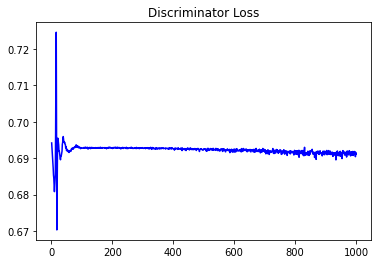

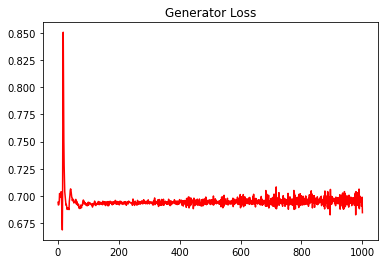

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2059326369217431


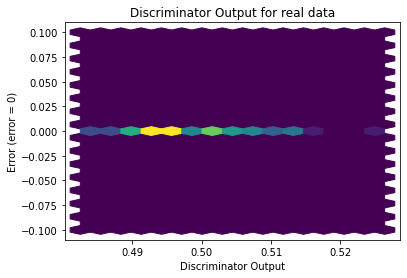

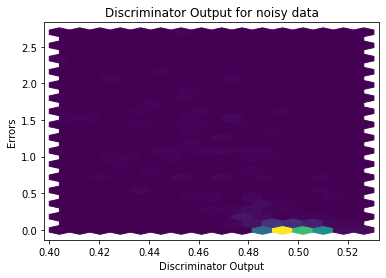

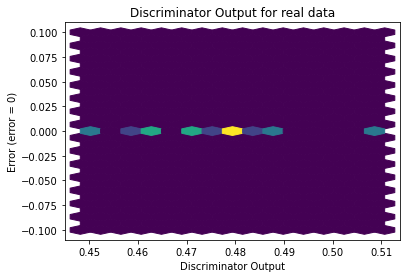

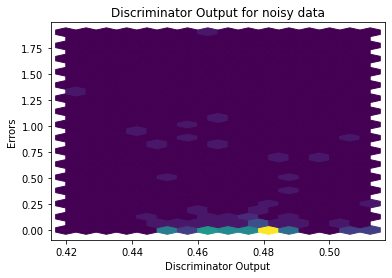

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


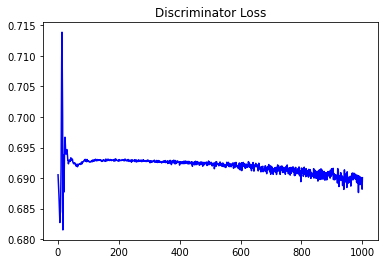

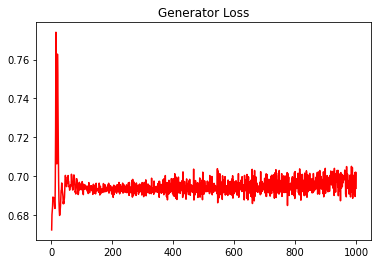

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.17458186138656373


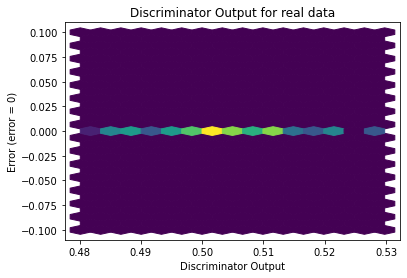

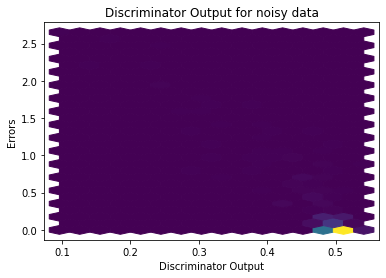

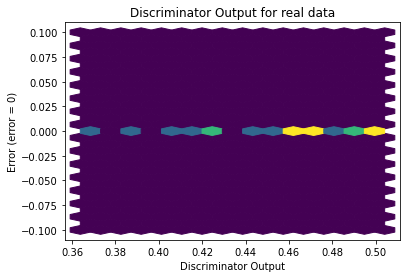

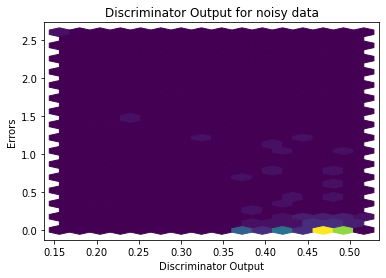

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5008]], requires_grad=True)
